# Phase 1 Project


* Student name: Mustafa Furkan Kolanci, Chris O’Malley, and Andy Schmeck
* Instructor name: Angelica Spratley


## Business Understanding

A business stakeholder at Microsoft seeks recommendations on starting their own movie studio. This could bolster their current streaming platform Microsoft Movies & TV.  Other tech giants like Amazon and Netflix have launched their own movie studios with great success (3.6 and 25 billion dollars in revenue respectively). Specifically the stakeholder desires to know the type of movie that would be most profitable.

In order to provide business recommendations, our team ingested datasets from IMDB, Rotten Tomatoes, The Movie Database, The Numbers, and Box Office Mojo. In this Jupyter Notebook, we have cleaned, merged and analytically explored what parameters should be evaluated in order to ensure maximum profitability. The team has decided to analyze and provide recommendations on which studios to work with, what genres should be considered and what directors should be reviewed so that profits can be maximized. The decision to dive deeper into these parameters was taken intuitively as the team predicted that studio, genre and directors would have large impact on profitability.

## Data Understanding and Selection

The team started by importing necessary modules and all dataset files into Jupyter Notebook

In [1]:
# Import necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
# Import all files into Jupyter notebook

bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv') 

imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv') 
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv') 
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv') 
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv') 
imdb_title_principles = pd.read_csv('data/imdb.title.principals.csv') 
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv') 

rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape') 

tmdb_movies = pd.read_csv('data/tmdb.movies.csv') 

tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv') 

Below are all the raw dataset names (highlighted) and their columns presented in tabular format.

![alt text](datasets.JPG)

### Profit Dataset Selection

Since the stakeholder desires profitability, the team identified `bom_movie_gross`, `rt_movie_info` and `tn_movie_budgets` datasets to be the only three resources that include financial data about the revenue and cost of movies. In order to obtain information on how many rows, columns and column names there are in each dataset, the team used the `.info()` method on each dataset.

In [3]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The team observed that only 340 movies have revenue data in `rt_movie_info` dataset as opposed to 5782 movies having revenue and cost data in `tn_movie_budgets` dataset and 2037 movies have foreign and domestic revenue data in `bom_movie_gross` dataset. Therefore, the team has decided to use the `tn_movie_budgets` and `bom_movie_gross` datasets and not use the `rt_movie_info` dataset.

Next, the team had to explore what datasets to use in order to recommend studios that generate maximum profit , genres that that generate maximum profit and directors who generate maximum profit. 

### Movie Studios Dataset Selection

For the relationship between studios and profit, only two datasets had studio information: `bom_movie_gross` and `rt_movie_info`. Since `bom_movie_gross` had studio information on 3382 movies (can be observed below with the `bom_movie_gross.info()` command)  and `rt_movie_info` had studio information on 494 movies (can be observed below with the `rt_movie_info.info()` command), the team decided to go with `bom_movie_gross` as it is the more robust dataset. 

In [6]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Movie Genres Dataset Selection

For the relationship between genres and profit, only two datasets had information on movie genres: `imdb_title_basics` and `rt_movie_info`. Since `imdb_title_basics` had genre information on 140736 movies (can be observed below with the `imdb_title_basics.info()` command)  and `rt_movie_info` had genre information on 1552 movies (can be observed below with the `rt_movie_info.info()` command), the team decided to go with `imdb_movie_basics` dataset as it is the more robust dataset. 

In [8]:
 imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Movie Directors Dataset Selection

For the relationship between movie directors and profit, the `imdb_title_crew` dataset and `rt_movie_info` dataset had information on movie directors. Since `imdb_title_crew` had 140417 movie directors (can be observed below with the `imdb_title_crew.info()` command) and `rt_movie_info` had 1361 movie director information (can be observed below with the `rt_movie_info.info()` command), the team decided to go with `imdb_movie_basics` dataset as it is the more robust dataset.

In [10]:
imdb_title_crew.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [11]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


# Movie Studios vs Profit and Profit Margin

## Data Preparation

The team selected `bom_movie_gross` dataset for movie studio analysis for reasons explained earlier. The goal is to connect studios to profits, therefore we need to merge `bom_movie_gross` (dataset with the studio information) with `tn_movie_budget` (the only dataset which holds movie profit information). So let's start by merging these two datasets.

The column to merge on is `title` for `bom_movie_gross` and `movie` for `tn_movie_budgets` as they both have movie names in them. An outer join will be performed as we don't want to lose any data.

In [12]:
df_ms = bom_movie_gross.merge(tn_movie_budgets,left_on='title', right_on='movie', how='outer')

Only the `studio`, `production_budget`, `worldwide_gross` columns are needed as the relationship between studios and profits is investigated. 

In [13]:
df_ms = df_ms[['studio','production_budget', 'worldwide_gross']]
df_ms

,studio,production_budget,worldwide_gross
0,BV,"$200,000,000","$1,068,879,522"
1,BV,NaN,NaN
2,WB,NaN,NaN
3,WB,"$160,000,000","$835,524,642"
4,P/DW,"$165,000,000","$756,244,673"
...,...,...,...
7926,NaN,"$7,000",$0
7927,NaN,"$6,000","$240,495"
7928,NaN,"$5,000","$1,338"
7929,NaN,"$1,400",$0


Some rows appear to have missing values. Since all values in each column are required for exploring the relationship between studios and profits, let's drop all rows with missing values. 

In [14]:
df_ms = df_ms.dropna()

Next, let's run `df_ms.info()` to see what are the data types of each column are and `df_ms.head()` to see what the data looks like

In [15]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 3290
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   studio             1246 non-null   object
 1   production_budget  1246 non-null   object
 2   worldwide_gross    1246 non-null   object
dtypes: object(3)
memory usage: 38.9+ KB


In [16]:
df_ms.head()

,studio,production_budget,worldwide_gross
0,BV,"$200,000,000","$1,068,879,522"
3,WB,"$160,000,000","$835,524,642"
4,P/DW,"$165,000,000","$756,244,673"
5,Sum.,"$68,000,000","$706,102,828"
6,Par.,"$170,000,000","$621,156,389"


It appears that `production_budget` and `worldwide_gross` columns are objects, however, we need to calculate the profit of each movie by subtracting `production_budget` from `worldwide_gross`. So, we need to get rid of the commas that serve as thousand seperators, the dollar signs and finally convert all elements in each column into type `int` so that we can perform subtraction.

In [17]:
def strtoint(x):
    return int(x.replace(',', '').replace('$',''))

`strtoint` is a function that takes in a string, removes any commas and dollar signs in the string, converts it to an integer and returns that integer value.`strtoint` should be applied to each element in `production_budget` and `worldwide_gross` columns in order for both columns to be of integer type.

Let's apply `strtoint` to each element of each column using the `.map` method and lambda functions

In [18]:
df_ms['production_budget'] = df_ms['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
df_ms['worldwide_gross'] = df_ms['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)

<ipython-input-18-efda7ff42613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['production_budget'] = df_ms['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
<ipython-input-18-efda7ff42613>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['worldwide_gross'] = df_ms['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)


Now that `production_budget` and `worldwide_gross` are both integer columns, the profit for each movie can be calculated.

In [19]:
df_ms['profit'] = df_ms['worldwide_gross'] - df_ms['production_budget']

<ipython-input-19-953f78300954>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['profit'] = df_ms['worldwide_gross'] - df_ms['production_budget']


Let's also calculate the profit margin, which shows how much of the total gross consists of the profit.

In [20]:
df_ms['profit_margin'] = (df_ms['profit']/df_ms['worldwide_gross']) * 100

<ipython-input-20-270e8abf5855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['profit_margin'] = (df_ms['profit']/df_ms['worldwide_gross']) * 100


Now, the profit and profit margin of each movie is present in the dataframe. Next, let's take a look at how many movies each studio has. 

In [21]:
df_ms['studio'].value_counts()

Uni.       117
Fox        110
WB         102
Sony        74
Par.        74
          ... 
Strand       1
CE           1
WHE          1
3D           1
Relbig.      1
Name: studio, Length: 99, dtype: int64

It appears that some studios have a lot more movies than others. Let's look at the descriptive statistics for count of movies for each studio.

In [22]:
df_ms['studio'].value_counts().describe()

count     99.000000
mean      12.585859
std       23.758998
min        1.000000
25%        1.000000
50%        2.000000
75%       10.000000
max      117.000000
Name: studio, dtype: float64

The median is 4 which means half the studios have 4 or less movies. The team decided that studios that have 4 or less movies should not be considered. This is because there needs to be enough movies produced by a studio in order for the average to be more consistent. Therefore, let's extract the names of studios with four or less movies.

In [23]:
threeplusstudios = [studio for studio in df_ms['studio'].value_counts().index if df_ms['studio'].value_counts()[studio] > 4]

Now, let's filter the dataframe so that only studios with more than four movies remain. 

In [24]:
df_ms = df_ms[df_ms['studio'].isin(threeplusstudios)]

Next, let's group the dataframe by studios and take the average of profits for each studio. Let's also pick the top 10 studios with the highest profit per movie and see what the dataframe looks like.

In [25]:
df_sp = df_ms.groupby('studio').mean().sort_values('profit', ascending=False).iloc[0:10]
df_sp

,production_budget,worldwide_gross,profit,profit_margin
studio,,,,
P/DW,1.334000e+08,5.078028e+08,3.744028e+08,50.256345
BV,1.312611e+08,4.623058e+08,3.310447e+08,45.869992
Uni.,5.639060e+07,2.335837e+08,1.771931e+08,46.807043
Fox,7.050455e+07,2.435983e+08,1.730938e+08,50.038826
WB (NL),5.807027e+07,2.308342e+08,1.727639e+08,61.320895
Sony,6.825000e+07,2.378623e+08,1.696123e+08,58.097283
WB,8.036961e+07,2.175864e+08,1.372168e+08,36.524094
Par.,6.445946e+07,1.951109e+08,1.306514e+08,14.315212
Sum.,3.415000e+07,1.198865e+08,8.573647e+07,-19.073320


Let's also group the dataframe by studios and take the average of profit margins for each studio. Let's also pick the top 10 studios with the highest profit margin per movie and see what the dataframe looks like.

In [26]:
df_spm = df_ms.groupby('studio').mean().sort_values('profit_margin', ascending=False).iloc[0:10]
df_spm

,production_budget,worldwide_gross,profit,profit_margin
studio,,,,
BH Tilt,2.800000e+06,1.323772e+07,1.043772e+07,75.599998
TriS,2.748889e+07,9.119100e+07,6.370211e+07,69.207628
WB (NL),5.807027e+07,2.308342e+08,1.727639e+08,61.320895
Sony,6.825000e+07,2.378623e+08,1.696123e+08,58.097283
W/Dim.,2.406250e+07,7.610649e+07,5.204399e+07,53.201242
P/DW,1.334000e+08,5.078028e+08,3.744028e+08,50.256345
Fox,7.050455e+07,2.435983e+08,1.730938e+08,50.038826
Focus,2.132051e+07,5.737277e+07,3.605226e+07,49.476851
CBS,1.920000e+07,5.156630e+07,3.236630e+07,47.365339


## Data Analysis

Finally, let's create plots to visualize the data. Let's start with a bar chart which displays profit of the top 10 highest average profit studios.

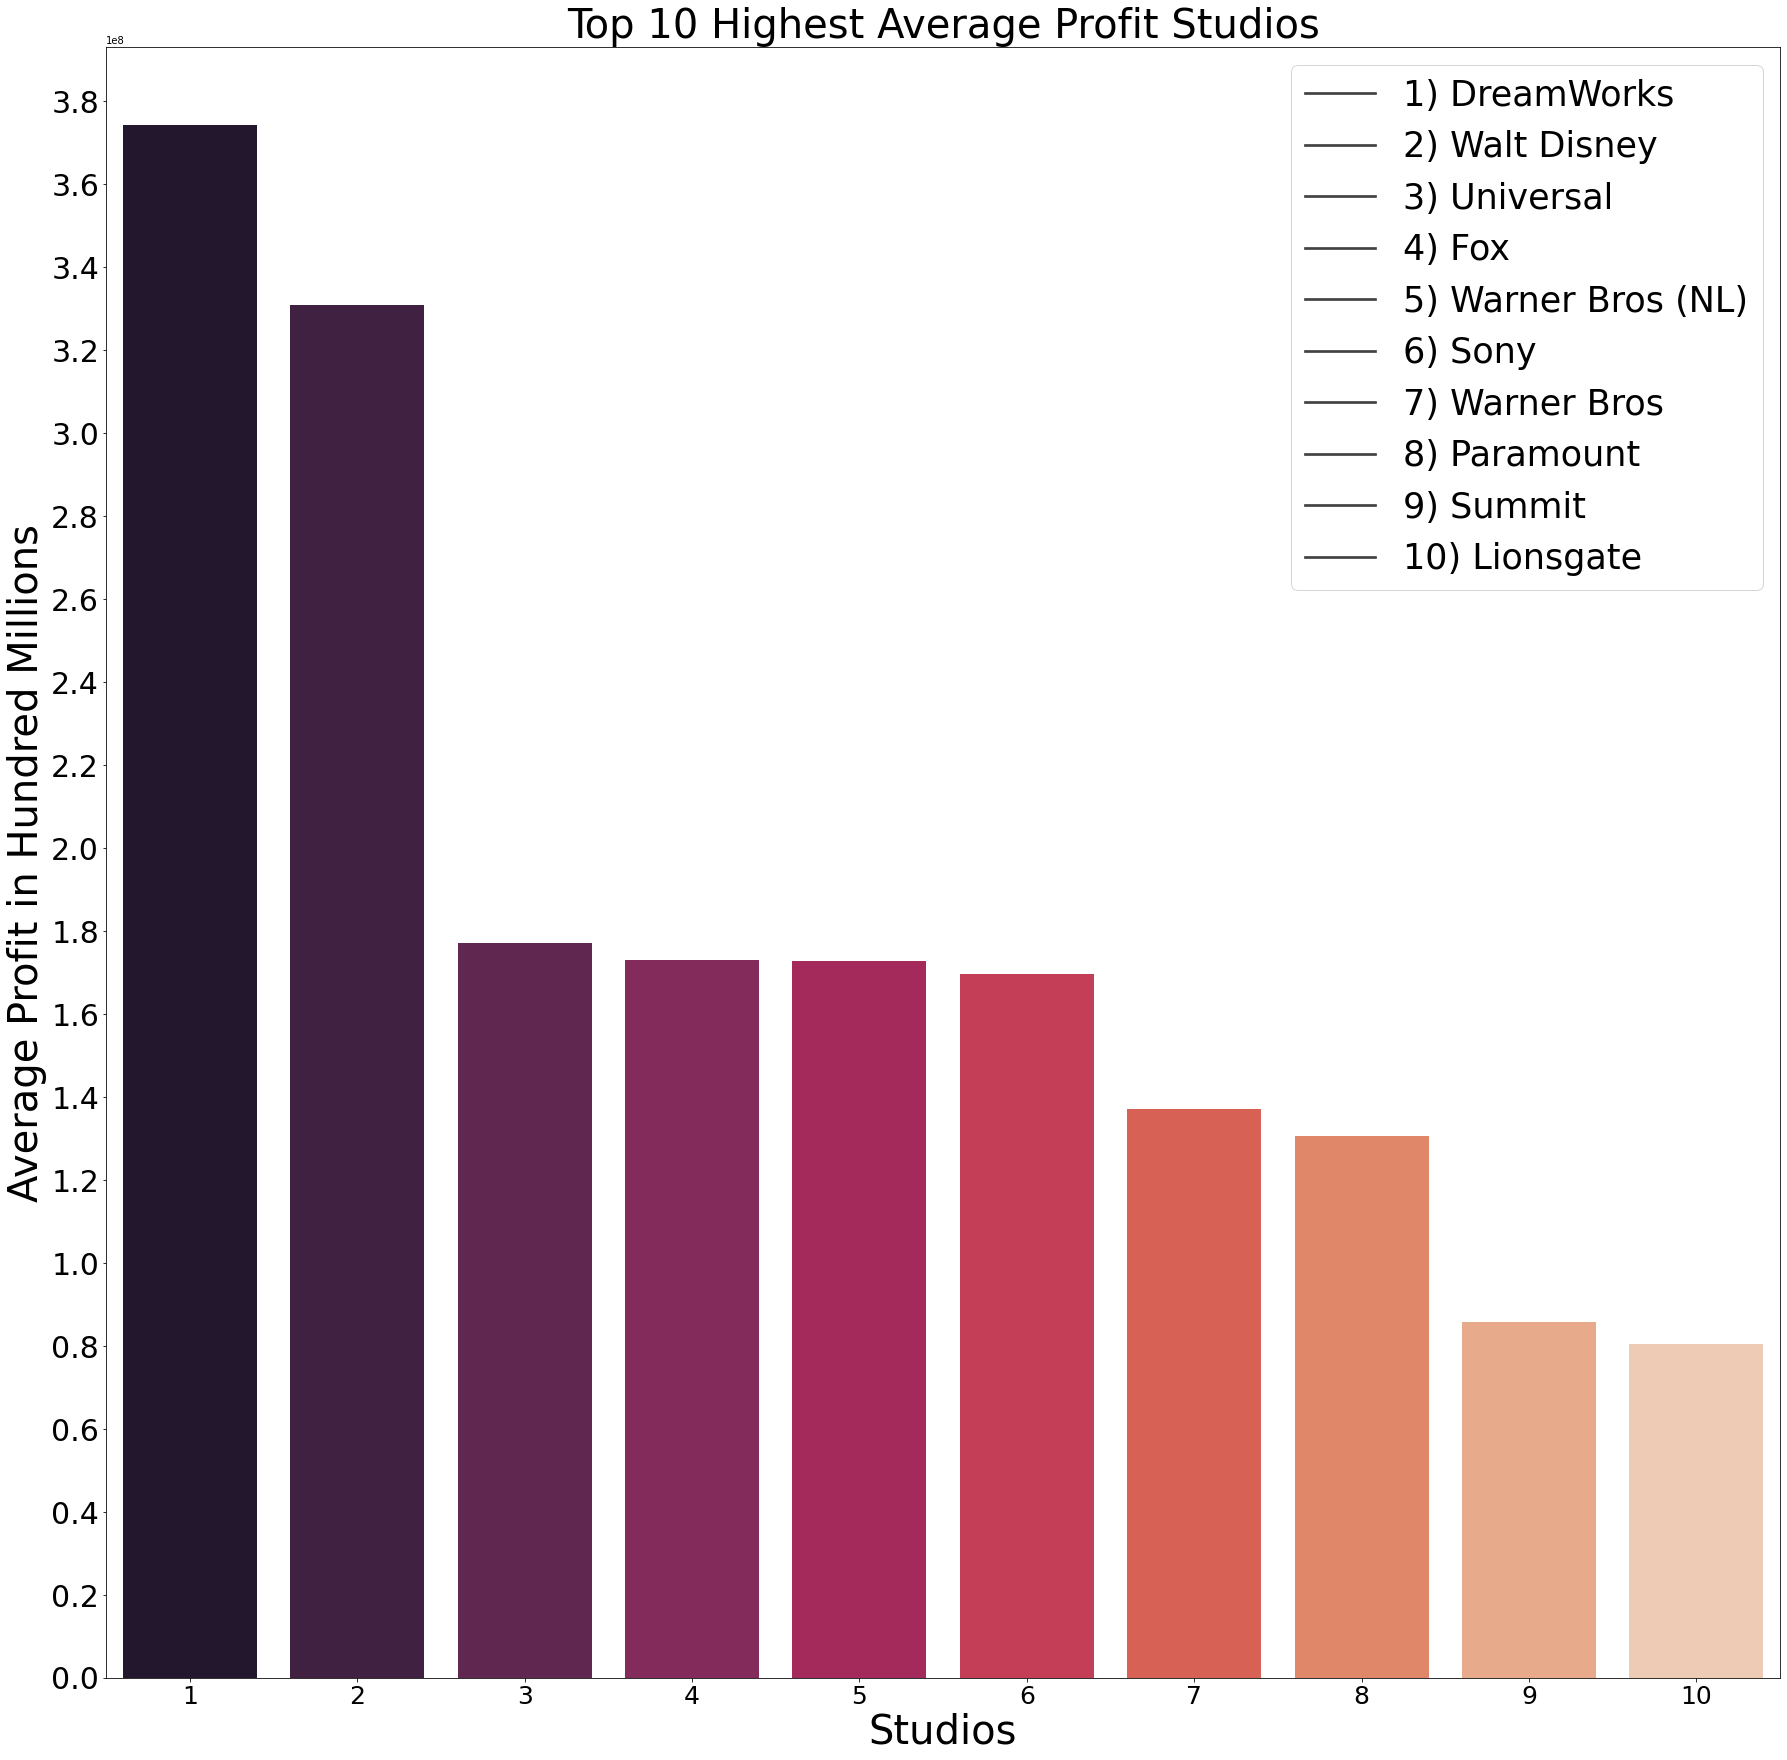

In [27]:
fig, ax = plt.subplots(figsize=(30,30))
# The dataframe has the abbreviated versions of the studios. Let's expand for better data representation
abbreviated_studios = df_sp.index
expanded_studios = ['DreamWorks','Walt Disney','Universal','Fox','Warner Bros (NL)', 'Sony', 'Warner Bros', 'Paramount', 'Summit', 'Lionsgate' ]
x = list(range(1,11))
y = df_sp['profit']
legend=[]
for index,value in enumerate(expanded_studios):
    legend.append(str(index+1) + ') ' + value)
ax.set_title('Top 10 Highest Average Profit Studios', size=40)

sns.barplot(x=x, y=y, palette="rocket")
ax.set_xlabel('Studios', size=40)
ax.set_ylabel("Average Profit in Hundred Millions", size=40)
ax.set_xticklabels(x, size=25)
leg = ax.legend(legend, prop={"size":35})
yticks = list(range(0, 400000000, 20000000))
plt.yticks(yticks, fontsize=30);

Let's also create a bar chart to visualize the average profit margins of the top 10 studios with the highest average profit margin.

<ipython-input-28-c9098ee5943a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels, size=15)


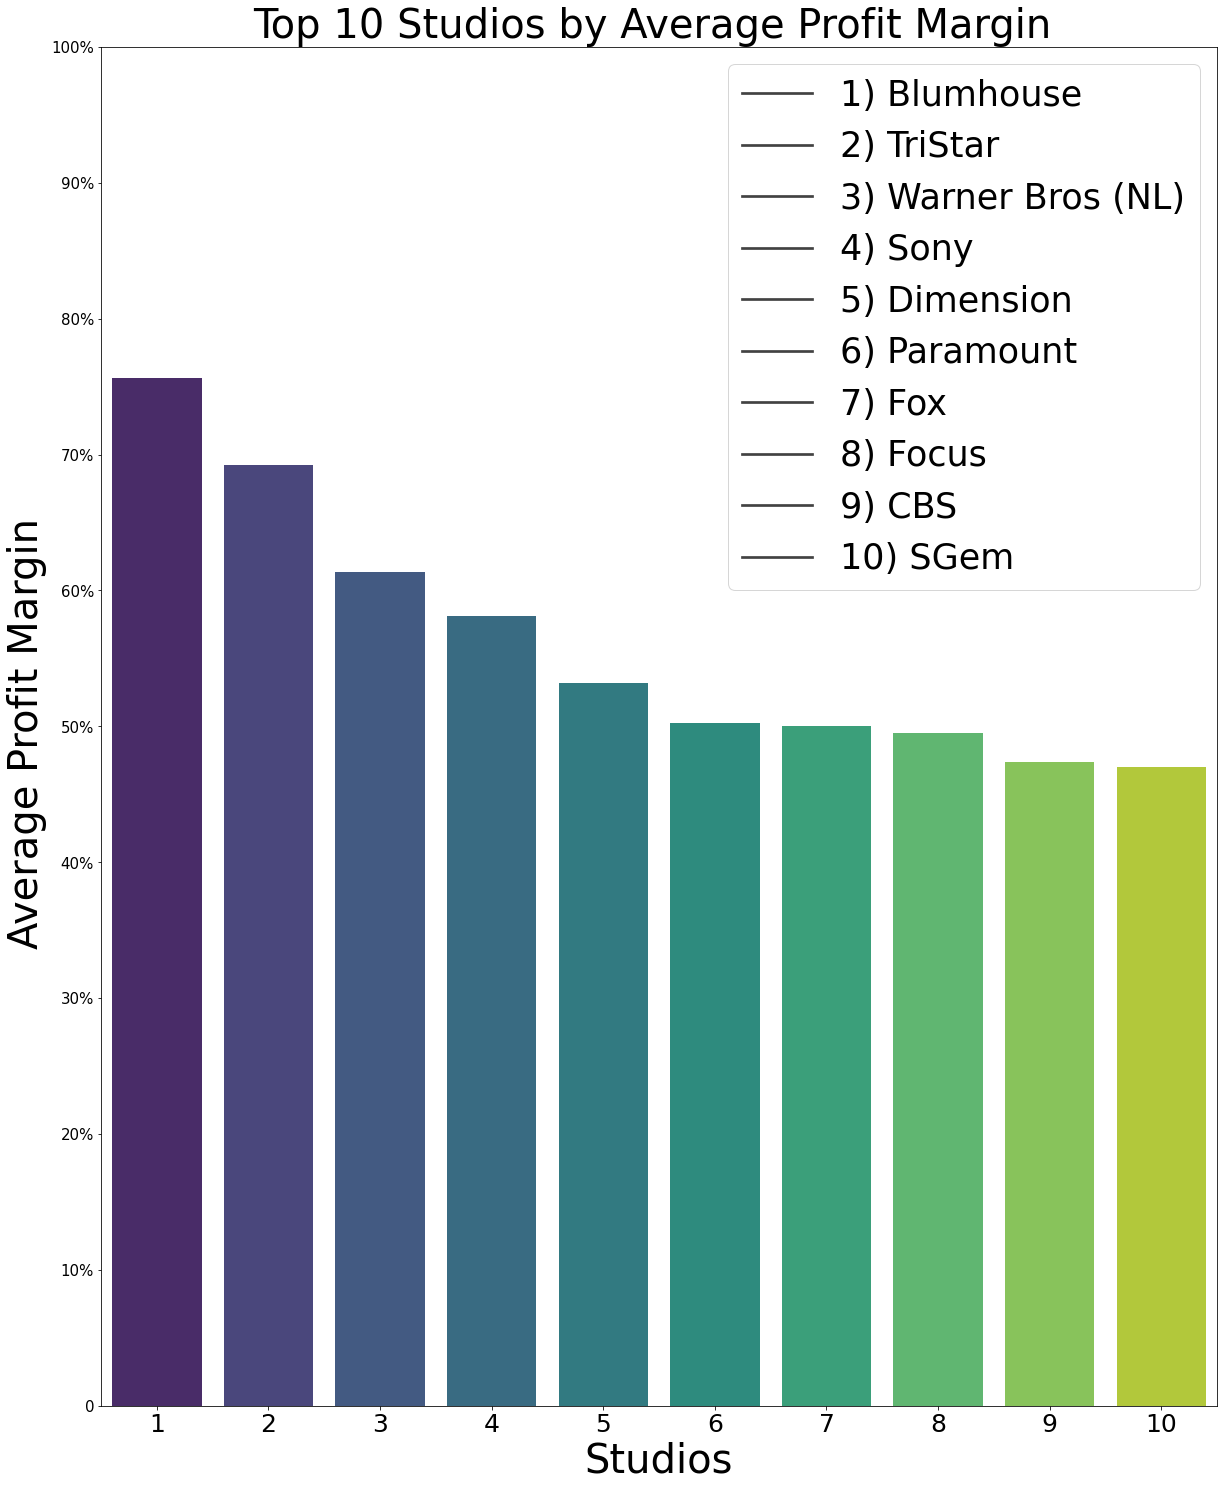

In [28]:
fig, ax = plt.subplots(figsize=(20,25))
# The dataframe has the abbreviated versions of the studios. Let's expand for better data representation
abbreviated_studios_pp = df_spm.index 
expanded_studios_ppm = ['Blumhouse', 'TriStar', 'Warner Bros (NL)', 'Sony','Dimension','Paramount', 'Fox','Focus','CBS','SGem']
x = list(range(1,11))
y = df_spm['profit_margin']
legend=[]
for index,value in enumerate(expanded_studios_ppm):
    legend.append(str(index+1) + ') ' + value)
ax.set_title('Top 10 Studios by Average Profit Margin ', size=40)
sns.barplot(x=x, y=y, palette="viridis")
ax.set_xlabel('Studios', size=40)
ax.set_ylabel("Average Profit Margin ", size=40)
ax.set_xticklabels(x, size=25)

leg = ax.legend(legend, prop={"size":35})
yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
yticklabels = ['0', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_yticklabels(yticklabels, size=15)
plt.yticks(yticks);

plt.yticks(yticks);

# Movie Genres vs Profit and Profit Margin

## Data Preparation

The team selected `imdb_title_basics` dataset for movie genres analysis for reasons explained earlier. The goal is to connect genres to profits, therefore we need to merge `imdb_title_basics` (dataset with the genre information) with `tn_movie_budget` (the only dataset which holds movie profit information). So let's start by merging these two datasets.

The column to merge on is `original title` for `imdb_title_basics` and `movie` for `tn_movie_budgets` as they both have movie names in them. An outer join will be performed as we don't want to lose any data.

In [29]:
df_mg = imdb_title_basics.merge(tn_movie_budgets,left_on='original_title', right_on='movie', how='outer')

Only the `genres`, `worldwide_gross`, `production_budgets` columns are needed as the relationship between genres and profits is investigated. 

In [30]:
df_mg = df_mg[['genres', 'worldwide_gross', 'production_budget']]
df_mg

,genres,worldwide_gross,production_budget
0,"Action,Crime,Drama",NaN,NaN
1,"Biography,Drama",NaN,NaN
2,Drama,NaN,NaN
3,"Comedy,Drama",NaN,NaN
4,"Comedy,Drama,Fantasy",NaN,NaN
...,...,...,...
149770,NaN,"$71,644","$7,000"
149771,NaN,$900,"$7,000"
149772,NaN,"$240,495","$6,000"
149773,NaN,"$1,338","$5,000"


Some rows appear to have missing values. Since all values in each column are required for exploring the relationship between genres and profits, let's drop all rows with missing values. 

In [31]:
df_mg = df_mg.dropna()

Next, let's run `df_mg.info()` to see what are the data types of each column are and run `df_mg.head()` to see what the data looks like

In [32]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 23 to 146177
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genres             3473 non-null   object
 1   worldwide_gross    3473 non-null   object
 2   production_budget  3473 non-null   object
dtypes: object(3)
memory usage: 108.5+ KB


In [33]:
df_mg.head()

,genres,worldwide_gross,production_budget
23,"Action,Animation,Comedy","$73,706","$45,000,000"
38,"Action,Adventure,Fantasy","$122,133,227","$20,000,000"
49,"Comedy,Mystery","$1,165,996","$200,000"
57,"Adventure,Drama,Romance","$9,313,302","$25,000,000"
58,Drama,"$9,313,302","$25,000,000"


It appears that `production_budget` and `worldwide_gross` columns are objects, however, we need to calculate the profit of each movie by subtracting `production_budget` from `worldwide_gross`. So, we need use the `strtoint` function defined earlier to convert `production_budget` and `worldwide_gross` columns into type `int`, so that we can perform subtraction. 

Let's apply `strtoint` to each element of each column using the `.map` method and lambda functions

In [34]:
df_mg['production_budget'] = df_mg['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
df_mg['worldwide_gross'] = df_mg['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)

<ipython-input-34-39201678c87c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['production_budget'] = df_mg['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
<ipython-input-34-39201678c87c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['worldwide_gross'] = df_mg['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)


Now that `production_budget` and `worldwide_gross` are both integer columns, the profit for each movie can be calculated.

In [35]:
df_mg['profit'] = df_mg['worldwide_gross'] - df_mg['production_budget']

<ipython-input-35-d8801cc8064e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['profit'] = df_mg['worldwide_gross'] - df_mg['production_budget']


Let's also calculate the profit margin, which shows how much of the total gross consists of the profit.

In [36]:
df_mg['profit_margin'] = (df_mg['profit']/df_mg['worldwide_gross']) * 100

<ipython-input-36-39a69c1e5d1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['profit_margin'] = (df_mg['profit']/df_mg['worldwide_gross']) * 100


Now, the profit and profit margin of each movie is present in the dataframe. Next, let's take a look at how many movies each genre has. 

In [37]:
df_mg['genres'].value_counts()

Drama                         402
Documentary                   266
Comedy                        123
Horror                         98
Comedy,Drama                   92
                             ... 
Adventure,Crime,Thriller        1
Adventure,Comedy,Romance        1
Animation,Sci-Fi                1
Documentary,Family,History      1
Drama,History,Mystery           1
Name: genres, Length: 337, dtype: int64

It appears that some genres have a lot more movies than others. Let's look at the descriptive statistics for count of movies for each genre.

In [38]:
df_mg['genres'].value_counts().describe()

count    337.000000
mean      10.305638
std       29.831547
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      402.000000
Name: genres, dtype: float64

The mean is around 10 which means the average genre have around 10 movies. The team decided that genres that have less than 10 movies should not be considered. This is because there needs to be enough movies in a genre in order for the average to be more consistent. Therefore, let's extract the names of genres with less than 10 movies.

In [39]:
tenplusgenres = [genre for genre in df_mg['genres'].value_counts().index if df_mg['genres'].value_counts()[genre] >= 10]

Now, let's filter the dataframe so that only genres with more than ten movies remain. 

In [40]:
df_mg = df_mg[df_mg['genres'].isin(tenplusgenres)]

Next, let's group the dataframe by genres and take the average of profits for each genre. Let's also pick the top 10 genres with the highest profit per movie and see what it looks like.

In [41]:
df_mg_p = df_mg.groupby('genres').mean().sort_values('profit', ascending=False).iloc[0:10]
df_mg_p

,worldwide_gross,production_budget,profit,profit_margin
genres,,,,
"Action,Adventure,Sci-Fi",5.737437e+08,1.563496e+08,4.173941e+08,-inf
"Action,Adventure,Animation",4.570707e+08,1.218125e+08,3.352582e+08,-221.235359
"Adventure,Animation,Comedy",3.715453e+08,9.645946e+07,2.750859e+08,-inf
"Adventure,Family,Fantasy",3.722124e+08,1.322750e+08,2.399374e+08,-inf
"Action,Adventure,Comedy",3.169669e+08,8.243750e+07,2.345294e+08,-inf
"Action,Adventure,Thriller",3.391839e+08,1.222143e+08,2.169696e+08,54.148107
Family,2.500351e+08,3.528846e+07,2.147466e+08,-inf
"Action,Adventure,Fantasy",3.345574e+08,1.244667e+08,2.100907e+08,20.181032
Adventure,2.325522e+08,3.286250e+07,1.996897e+08,-inf


Let's also group the dataframe by genres and take the average of profit margins for each genre. Let's also pick the top 10 genres with the highest profit margin per movie and see what it looks like.

In [42]:
df_mg_pp = df_mg.groupby('genres').mean().sort_values('profit_margin', ascending=False).iloc[0:10]
df_mg_pp

,worldwide_gross,production_budget,profit,profit_margin
genres,,,,
"Comedy,Family",6.643880e+07,2.635000e+07,4.008880e+07,54.946982
"Action,Adventure,Thriller",3.391839e+08,1.222143e+08,2.169696e+08,54.148107
"Adventure,Comedy,Drama",7.818641e+07,3.506364e+07,4.312278e+07,44.165678
"Action,Adventure,Fantasy",3.345574e+08,1.244667e+08,2.100907e+08,20.181032
"Biography,Drama,History",7.850388e+07,2.344852e+07,5.505536e+07,15.426864
"Biography,Drama",6.629384e+07,2.388095e+07,4.241289e+07,9.421607
"Drama,Fantasy,Horror",4.157582e+07,2.464167e+07,1.693415e+07,8.015736
"Biography,Crime,Drama",5.470876e+07,2.481800e+07,2.989076e+07,-56.664972
"Biography,Drama,Sport",5.293935e+07,2.430769e+07,2.863166e+07,-154.565829


It appears that the last 3 of the top 10 genres with the highest profit margin have negative profit margins, meaning that the movies in those genres lost money on average. Genres that lost money shouldn't be a part of the genre recommendation, so let's drop those genres.

In [43]:
df_mg_pp = df_mg_pp.iloc[0:7]
df_mg_pp

,worldwide_gross,production_budget,profit,profit_margin
genres,,,,
"Comedy,Family",6.643880e+07,2.635000e+07,4.008880e+07,54.946982
"Action,Adventure,Thriller",3.391839e+08,1.222143e+08,2.169696e+08,54.148107
"Adventure,Comedy,Drama",7.818641e+07,3.506364e+07,4.312278e+07,44.165678
"Action,Adventure,Fantasy",3.345574e+08,1.244667e+08,2.100907e+08,20.181032
"Biography,Drama,History",7.850388e+07,2.344852e+07,5.505536e+07,15.426864
"Biography,Drama",6.629384e+07,2.388095e+07,4.241289e+07,9.421607
"Drama,Fantasy,Horror",4.157582e+07,2.464167e+07,1.693415e+07,8.015736


## Data Analysis

Finally, let's create plots to visualize the data. Let's start with a bar chart which displays profit in dollars of the top 10 highest average profit genres.

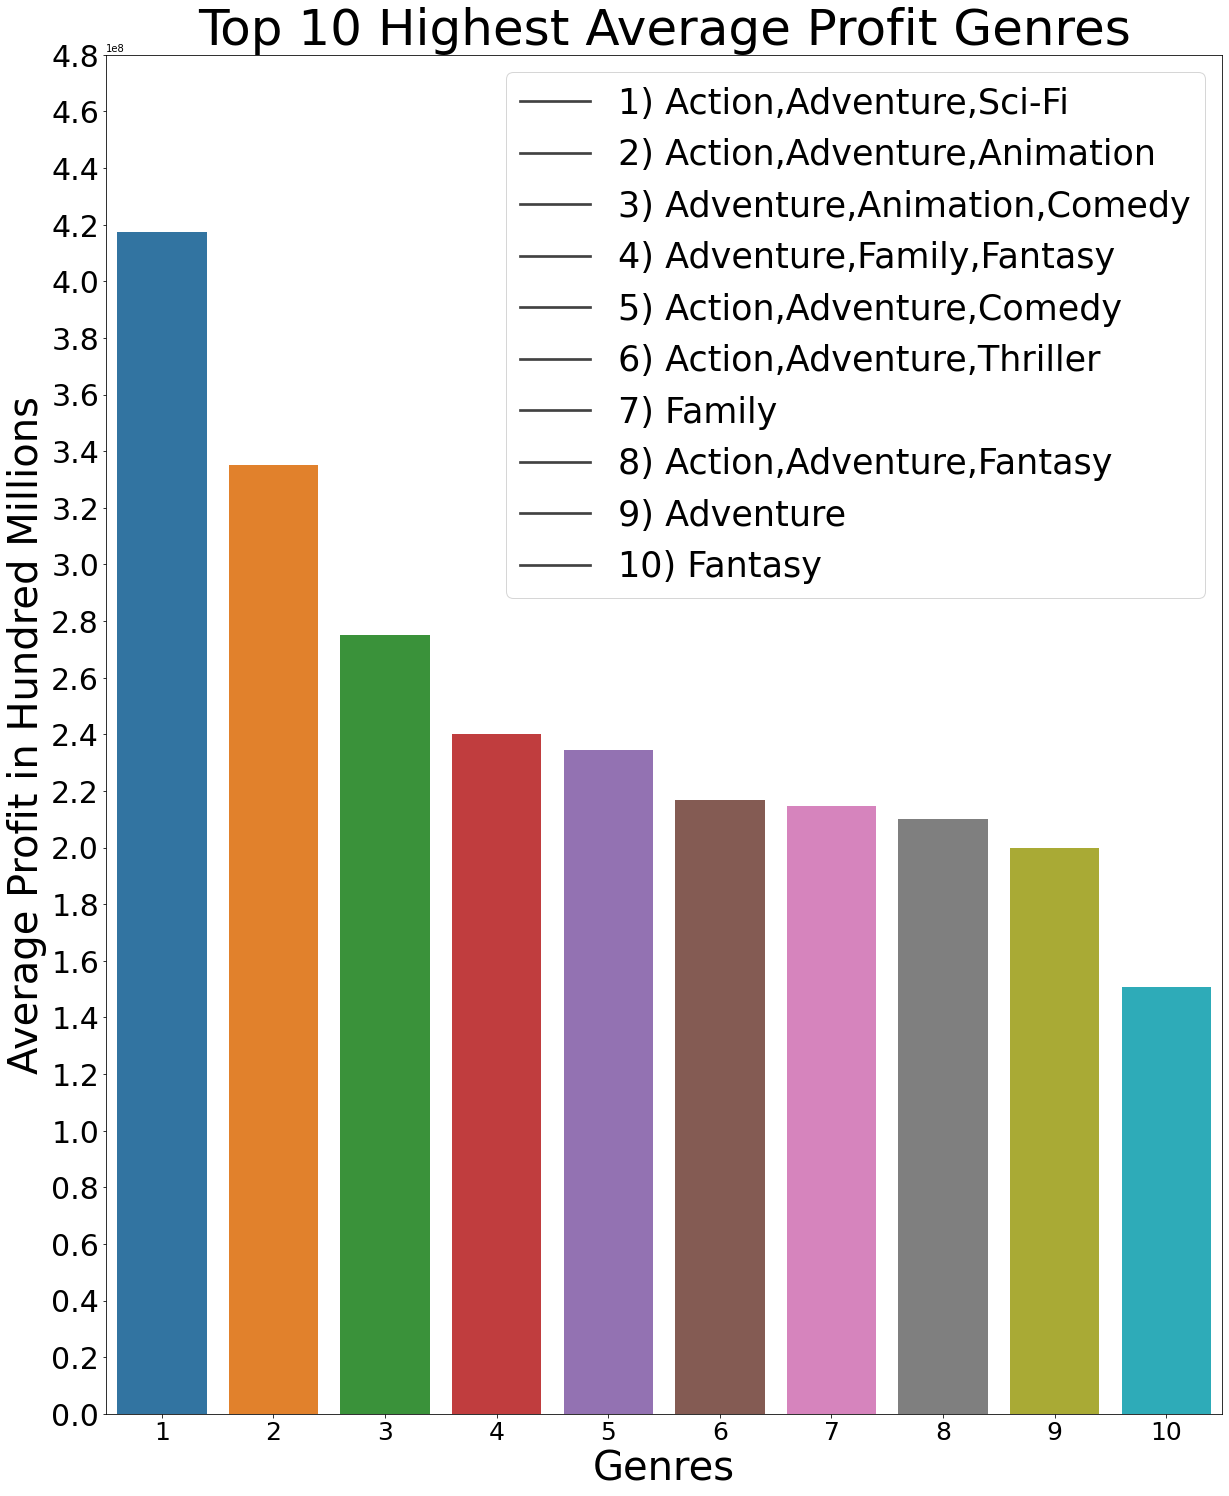

In [44]:
fig, ax = plt.subplots(figsize=(20, 25))
x = list(range(1,11)) 
y = df_mg_p['profit']
legend = []
for index,value in enumerate(df_mg_p.index):
    legend.append(str(index+1) + ') ' + value)
ax.set_title('Top 10 Highest Average Profit Genres', size=50)
sns.barplot(x=x, y=y)
ax.set_xlabel('Genres', size=40)
ax.set_ylabel("Average Profit in Hundred Millions", size=40)
ax.set_xticklabels(x, size=25)
leg = ax.legend(legend, prop={"size":35})
yticks = list(range(0, 500000000, 20000000))
plt.yticks(yticks, fontsize=30);

Let's also create a bar chart to visualize the average profit margins of the top 7 genres with the highest average profit margin.

<ipython-input-45-bec8b24bc04c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels, size=15)


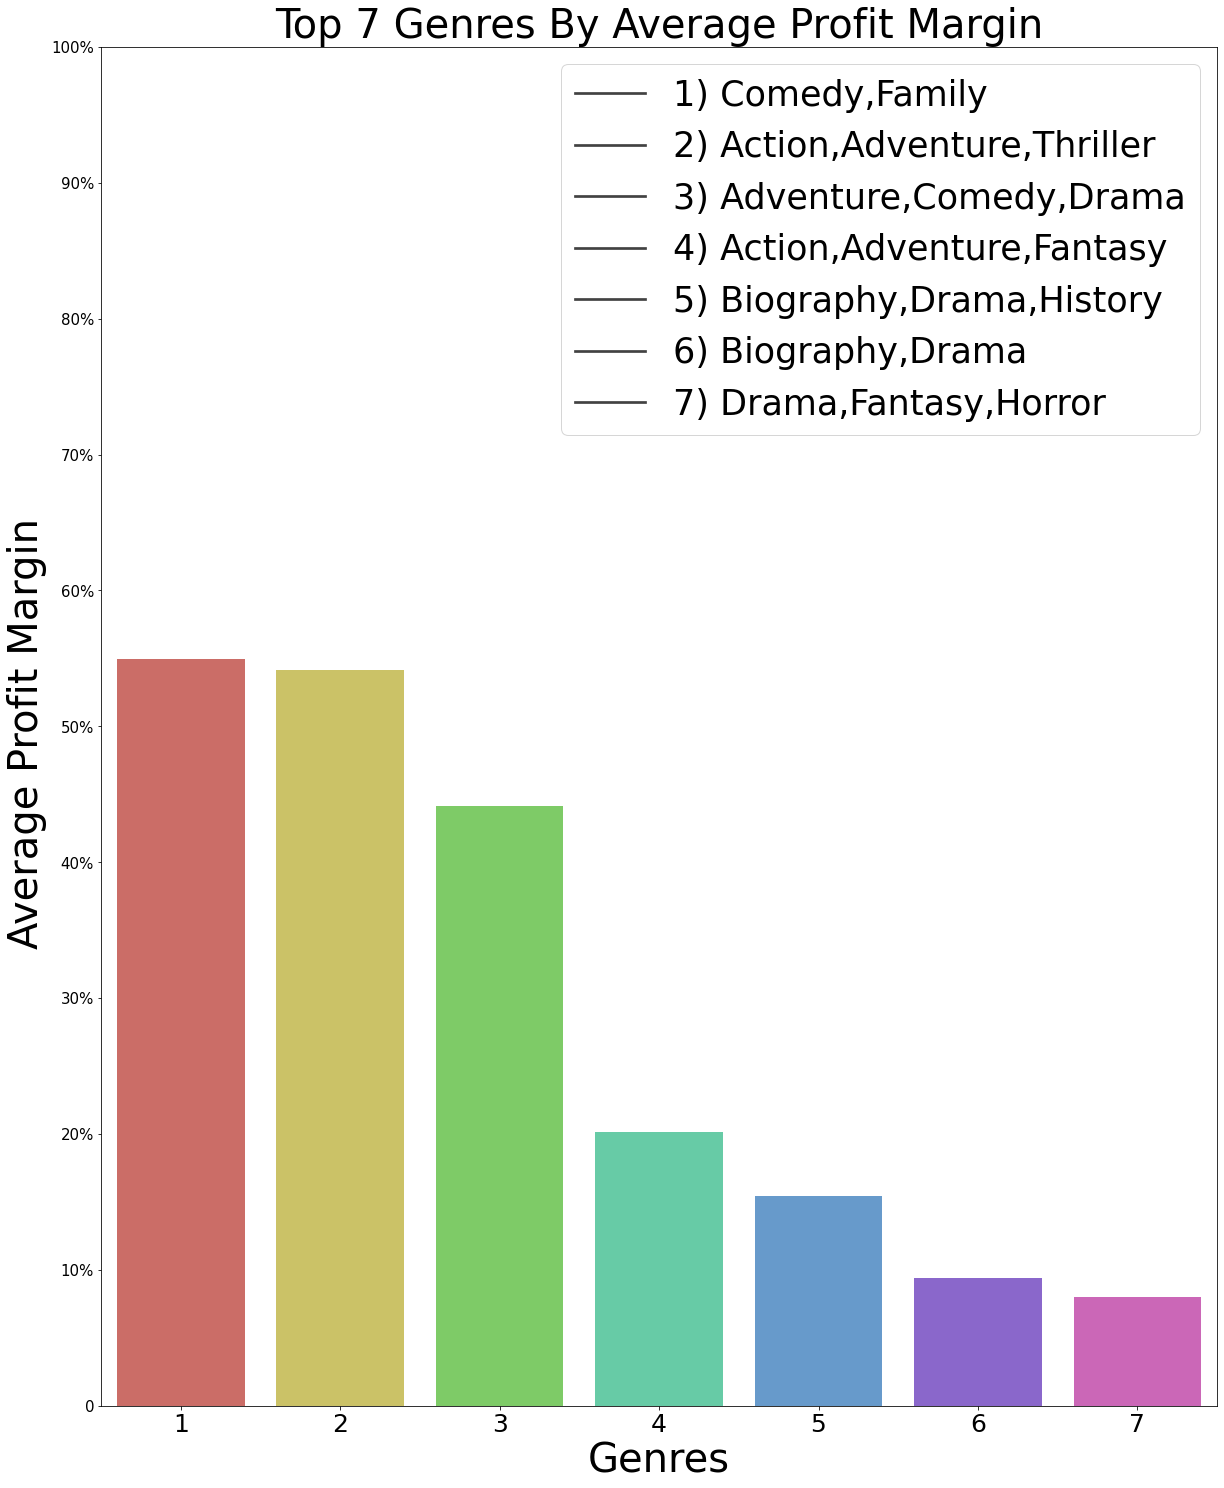

In [45]:
fig, ax = plt.subplots(figsize=(20, 25))
x = list(range(1,8)) 
y = df_mg_pp['profit_margin']
legend = []
for index,value in enumerate(df_mg_pp.index):
    legend.append(str(index+1) + ') ' + value)
ax.set_title('Top 7 Genres By Average Profit Margin', size=40)
sns.barplot(x=x, y=y, palette="hls")
ax.set_xlabel('Genres', size=40)
ax.set_ylabel("Average Profit Margin ", size=40)
ax.set_xticklabels(x, size=25)

leg = ax.legend(legend, prop={"size":35})
yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
yticklabels = ['0', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_yticklabels(yticklabels, size=15)
plt.yticks(yticks);

# Movie Directors vs Profit and Profit Margin


## Data Preparation

The team selected `imdb_title_crew` dataset as a starting point for movie director analysis for reasons explained earlier. The goal is to connect directors to profits, however `imdb_title_crew` (dataset with the director information) and `tn_movie_budget` (the only dataset which holds movie profit information) cannot be merged directly as there are no common columns. Therefore, additional exploration is necessary to connect these two datasets. 

Before additional data exploration, `tn_movie_budget` dataset should be cleaned up as it will be used eventually for the analysis. It has been observed previously that `production_budget` and `domestic_gross` columns are type `object` and they should be converted to `int` in order to calculate `profit`. We can use the `strtoint` function defined earlier for this task. We can also get rid of movies that have generated zero dollars in `worldwide_gross` as directors of those movies will not be useful in recommending Microsoft directors to maximize their profits.

In [46]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: strtoint(x) if type(x) == str else x)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['worldwide_gross'] != 0]

Now we can begin the data exploration. When we look at the datasets available, the only way to connect directors and profit is through the movie names. So, we have to connect the `movie` column of `tn_movie_budgets` dataset with the `primary_title` column of `imdb_title_basics`. But before merging these datasets, let's run `tn_movie_budgets.head()` and `imdb_title_basics.head()` to see what these datasets look like. 

In [47]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [48]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


It appears that some movie names have punctuation marks such as `.`,`,`,`:`,`-`. Let's get rid of these so that we can retrieve maximum matches. 

In [49]:
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].map(lambda x: re.sub('[.,:-]', '', x))
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].map(lambda x: re.sub('[.,:-]', '', x))

Now that `imdb_title_basics` is cleaned up, let's merge it with `imdb_title_crew` so that we connect directors to movies. For fun, let's call this merged dataframe `imdb_frankenstein`.

In [50]:
imdb_frankenstein = imdb_title_basics.merge(imdb_title_crew, how='left', on='tconst')

Before we merge with `tn_movie_budgets` and connect directors to profit, we need to make sure the directors we include are alive. To do so, we need to merge `imdb_frankenstein` with `imdb_name_basics` dataset which includes a `death_year` column.  

In [51]:
imdb_frankenstein = imdb_frankenstein.merge(imdb_name_basics, how='left', left_on ='directors', right_on='nconst')

Let's start filtering `imdb_frankenstein`. We only need alive directors in the dataset. We should also drop duplicate movie titles and get rid of not needed columns for the analysis. Let's call the filtered dataset `imdb_frankenstein_bride`

In [52]:
#Filter to include only directors
imdb_frankenstein_bride = imdb_frankenstein[imdb_frankenstein['directors'].notna()]
# Remove deceased directors
imdb_frankenstein_bride = imdb_frankenstein_bride[imdb_frankenstein_bride['death_year'].isna()]
#remove duplicate movie titles
imdb_frankenstein_bride = imdb_frankenstein_bride.drop_duplicates(subset=['original_title'])
# Remove not needed columns
imdb_frankenstein_bride.drop(labels=['nconst', 'tconst', 'directors', 'writers', \
                                     'birth_year', 'death_year', 'primary_profession', 'known_for_titles'], \
                             axis=1, inplace=True)

Now that `imdb_frankenstein_bride` is cleaned up, let's merge it with `tn_movie_budgets` to complete the connection between directors and profit. Let's call the merged dataframe`tn_movie_monster`

In [53]:
tn_movie_monster = tn_movie_budgets.merge(imdb_frankenstein_bride, how='left', left_on='movie', right_on='primary_title')

Let's now take a look at the top 100 movies with the highest `worldwide_gross` and see if we can identify some movies and directors that are familiar.

In [54]:
top_100 = tn_movie_monster.sort_values('worldwide_gross', ascending=False)[:100][['movie', 'primary_name', 'start_year', 'production_budget', 'worldwide_gross', 'genres']]
top_100

,movie,primary_name,start_year,production_budget,worldwide_gross,genres
0,Avatar,Atsushi Wada,2011.0,425000000,2776345279,Horror
42,Titanic,NaN,2012.0,200000000,2208208395,Adventure
5,Star Wars Ep VII The Force Awakens,NaN,NaN,306000000,2053311220,NaN
6,Avengers Infinity War,NaN,2018.0,300000000,2048134200,"Action,Adventure,Sci-Fi"
33,Jurassic World,Colin Trevorrow,2015.0,215000000,1648854864,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...
30,The Amazing SpiderMan,Marc Webb,2012.0,220000000,757890267,"Action,Adventure,Sci-Fi"
58,2012,NaN,NaN,200000000,757677748,NaN
127,Shrek Forever After,Mike Mitchell,2010.0,165000000,756244673,"Adventure,Animation,Comedy"
54,XMen Days of Future Past,Bryan Singer,2014.0,200000000,747862775,"Action,Adventure,Sci-Fi"


Oooops. It appears that some director assignments for the movies is incorrect. Let's identify them and correct them.

In [55]:
top_100['primary_name'].iloc[0] = 'James Cameron'
top_100['primary_name'].iloc[1] = 'James Cameron'
top_100['primary_name'].iloc[2] = 'J.J. Abrams'
top_100['primary_name'].iloc[3] = 'Anthony Russo'
top_100['primary_name'].iloc[9] = 'David Yates'
top_100['primary_name'].iloc[10] = 'Rian Johnson'
top_100['primary_name'].iloc[19] = 'Kyle Balda'
top_100['primary_name'].iloc[21] = 'Peter Jackson'
top_100['primary_name'].iloc[22] = 'Anthony Russo'
top_100['primary_name'].iloc[24] = 'Ryan Fleck'
top_100['primary_name'].iloc[29] = 'Gore Verbinski'
top_100['primary_name'].iloc[32] = 'Steven Spielberg'
top_100['primary_name'].iloc[33] = 'Kyle Balda'
top_100['primary_name'].iloc[34] = 'George Lucas'
top_100['primary_name'].iloc[36] = 'Andrew Stanton'
top_100['primary_name'].iloc[37] = 'Byron Howard'
top_100['primary_name'].iloc[39] = 'Christopher Nolan'
top_100['primary_name'].iloc[41] = 'Pierre Coffin'
top_100['primary_name'].iloc[42] = 'Chris Columbus'
top_100['primary_name'].iloc[44] = 'Gore Verbinski'
top_100['primary_name'].iloc[45] = 'Wolfgang Reitherman'
top_100['primary_name'].iloc[46] = 'David Yates'
top_100['primary_name'].iloc[49] = 'David Yates'
top_100['primary_name'].iloc[50] = 'Andrew Adamson'
top_100['primary_name'].iloc[51] = 'Andrew Stanton'
top_100['primary_name'].iloc[52] = 'David Yates'
top_100['primary_name'].iloc[53] = 'Peter Jackson'
top_100['primary_name'].iloc[54] = 'David Yates'
top_100['primary_name'].iloc[56] = 'Sam Raimi'
top_100['primary_name'].iloc[57] = 'Peter Jackson'

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Now that the directors are fixed, let's calculate the `profit` and `profit_margin` for each movie

In [56]:
top_100['profit'] = top_100['worldwide_gross'] - top_100['production_budget']
top_100['profit_margin'] = (top_100['profit'] / top_100['worldwide_gross']) * 100

Finally, we can group `top_100` by director names, calculate the average profit and average profit margin for each director.

In [57]:
average_director_profits = top_100.groupby('primary_name').mean().sort_values('profit', ascending=False)
average_director_profits_margin= top_100.groupby('primary_name').mean().sort_values('profit_margin', ascending=False)

## Data Analysis

Finally, let's create plots to visualize the data. Let's start with a bar chart which displays profit in dollars of the top 10 highest average profit movie directors.

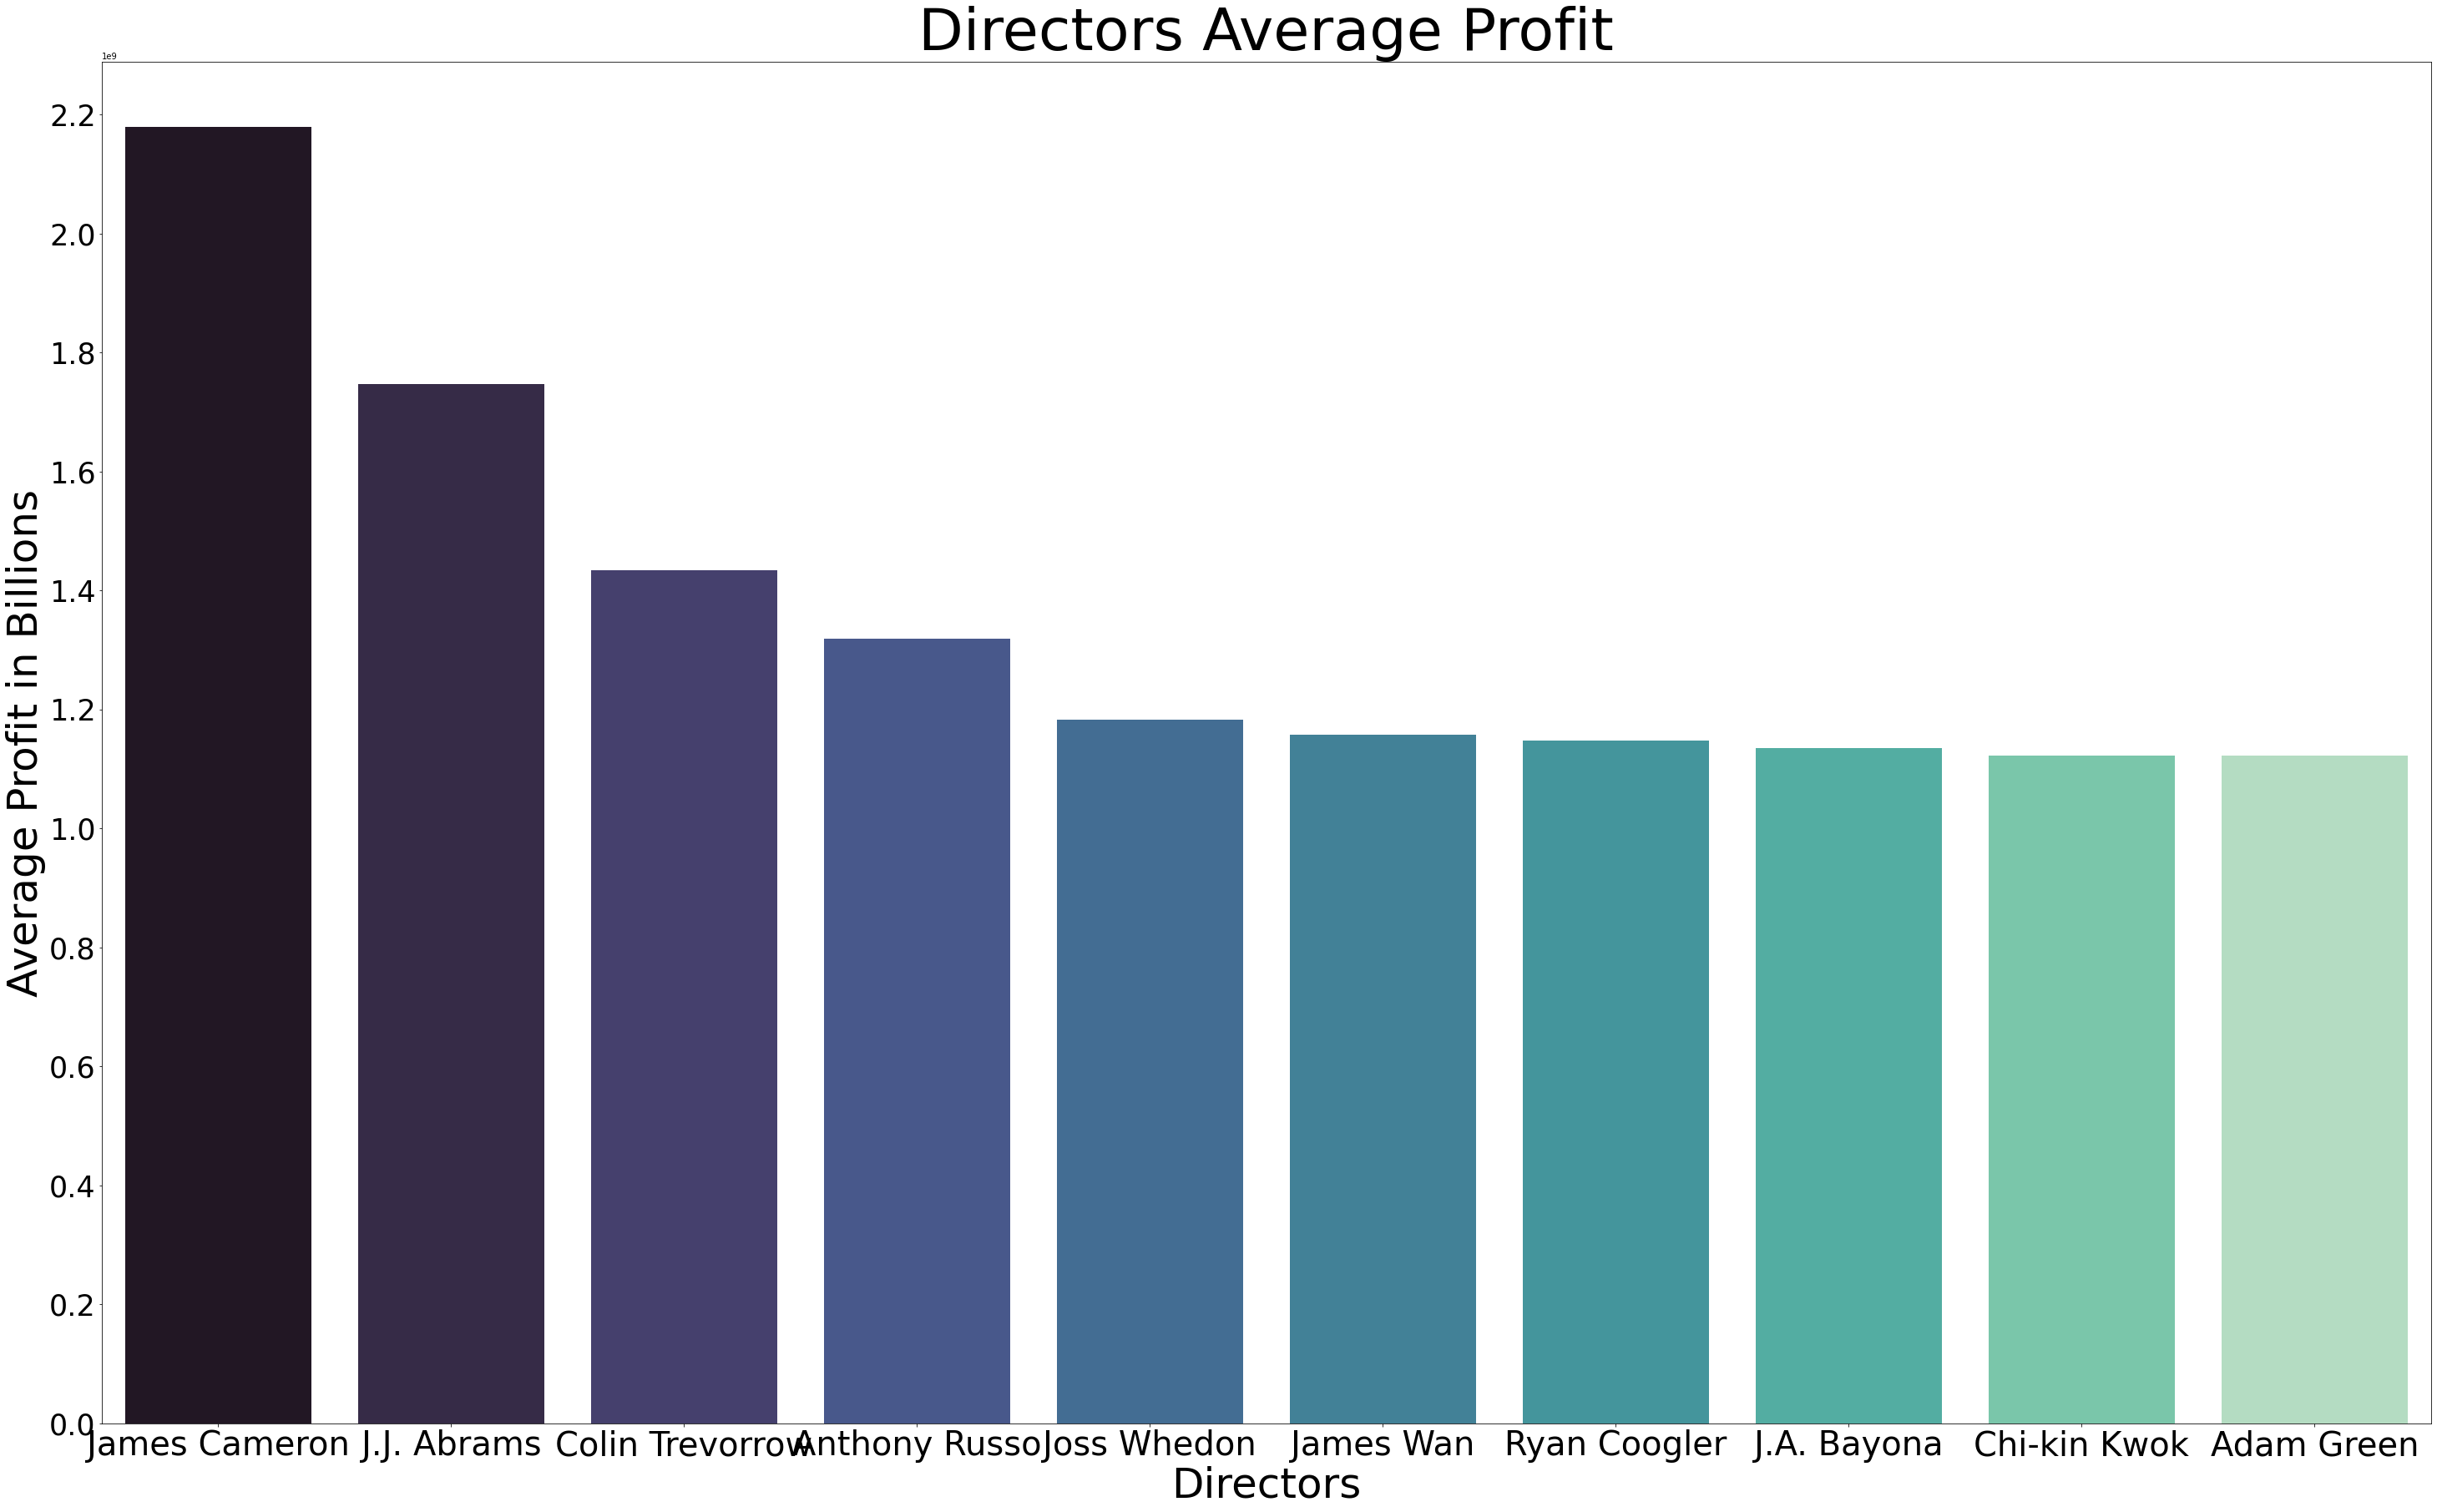

In [58]:
fig, ax = plt.subplots(figsize=(50, 30))
x = average_director_profits.index[:10]
y = average_director_profits['profit'][:10]
# Hardcoding scale instead
yticks = list(range(0, 3000000000, 200000000))

ax.set_title(label='Directors Average Profit', size=70)
plt.yticks(yticks, fontsize=35)
sns.set_color_codes('deep')
sns.barplot(x=x, y=y, palette='mako')
ax.set_xlabel('Directors', size=50)
ax.set_ylabel("Average Profit in Billions", size=50)
ax.set_xticklabels(x, size=40);

Let's also create a bar chart to visualize the average profit margins of the top 10 movie directors with the highest average profit margin.

<ipython-input-59-f801e563d283>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, size=15)


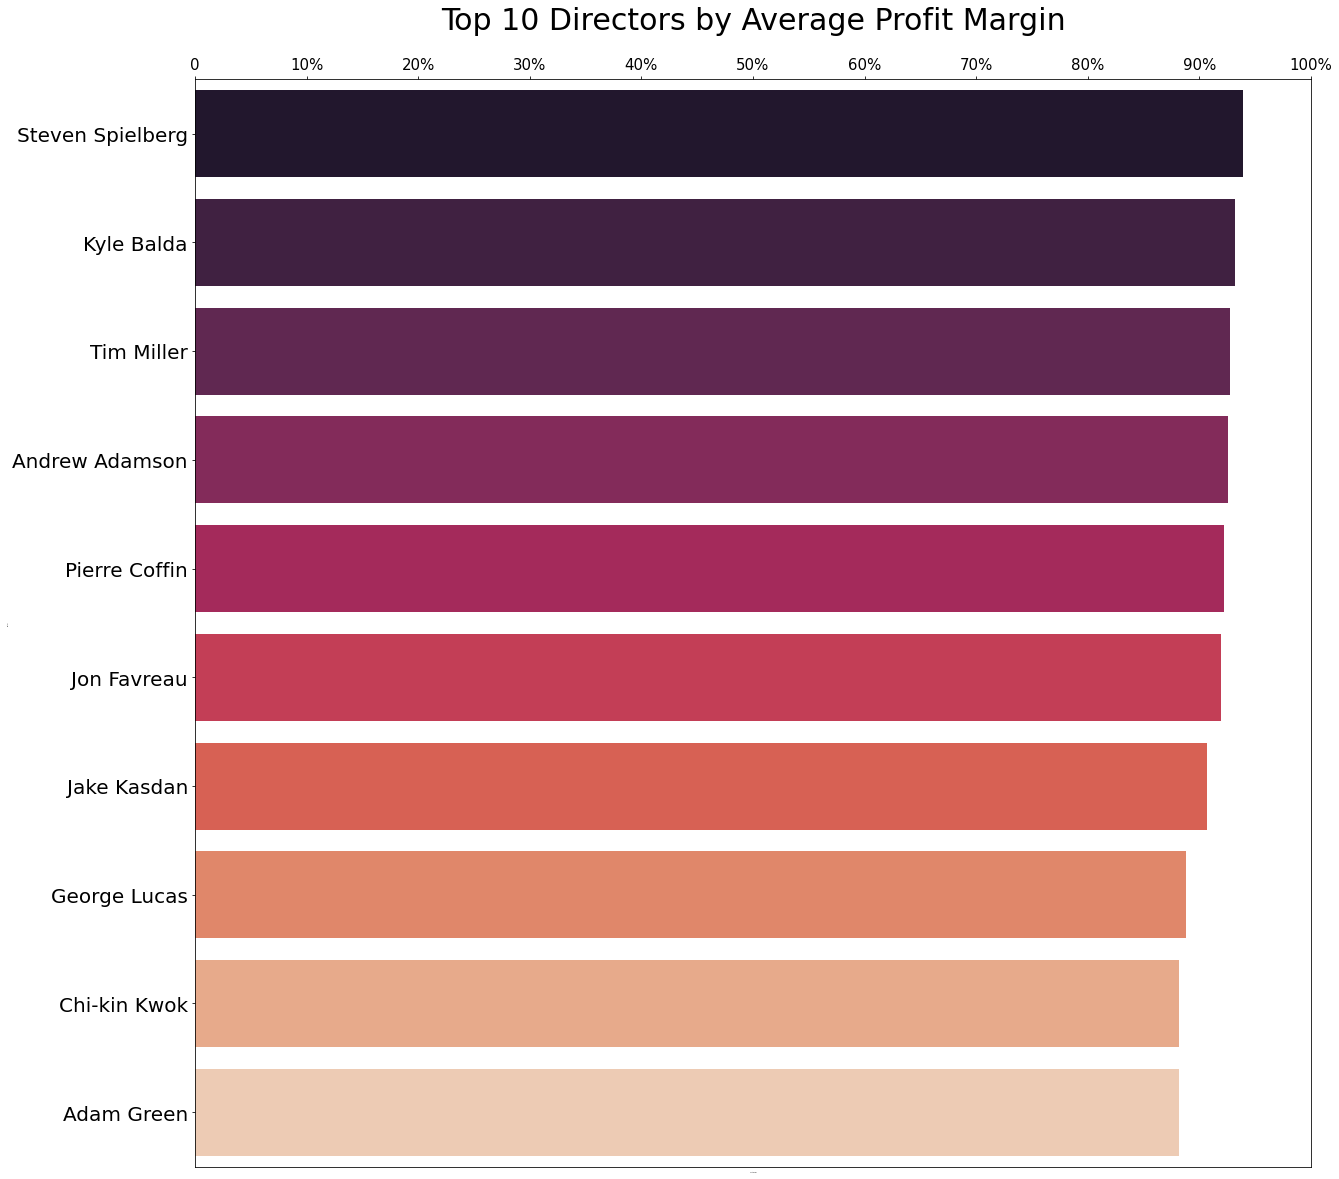

In [59]:
fig, ax = plt.subplots(figsize=(20, 20))

y = average_director_profits_margin.index[:10]
x =  average_director_profits_margin['profit_margin'][:10]


ax.set_title('Top 10 Directors by Average Profit Margin', size=30, pad=50)

sns.set_color_codes('deep')
sns.barplot(x=x, y=y, palette='rocket', orient='h')
ax.set_ylabel('Directors', size=0)
ax.set_xlabel("Profit Margin", size=0)
ax.set_yticklabels(y, size=20)
# Hardcoding scale instead
xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
xticklabels = ['0', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_xticklabels(xticklabels, size=15)
ax.xaxis.tick_top()

plt.xticks(xticks);

# Conclusions

The analysis leads to three recommendations for Microsoft to consider when creating movies. The team has decided that although the relationship between profit and studios, genres and directors respectively provides useful insight, relationship between profit margin and studios, genres and directors is more important to business decisions as profit margin describes what percent of revenue is profit. 

The analysis conducted on the relationship between movie genres and movie profit margins revealed the top 7 genres which have the highest average profit margin. Out of those 7 genres, comedy,family genre yields the highest average profit margin with 55%, therefore we recommend Microsoft to create a movie with comedy,family genre. 

The analysis conducted on the relationship between movie directors and movie profit margins revealed the top 10 directors who have the highest average profit margin. Out of those 10 directors, Kyle Balda is the director with highest average profit margin that has done movies in the comedy,family genre, so he is the team's primary recommendation. 

The analysis conducted on the relationship between movie studios and movie profit margins revealed the top 10 studios which  have the highest average profit margin. Out of those 10 studios, Warner Bros is the studio with highest average profit margin that has done movies in the comedy,family genre, so they are the team's primary recommendation.

# Next Steps



Further analyses could yield additional insights for movie recommendations.

One next step the team recommends is to purchase IMDB and BOM API access so that we can work with larger datasets with more movies. This way, more information will be available and less movie data will be dropped or hardcoded. 

Another next step is to investigate the relationship between cast and crew with profit margins. Due to time constraints, the team was not able to perform these analysis, but we think they are worth investigating.
